# Import package

In [1]:
import os
import torch
import pandas as pd
import numpy as np
import pytorch_lightning as pl
from pytorch_lightning import loggers
from pytorch_lightning.callbacks import ModelCheckpoint

In [2]:
%load_ext autoreload
%autoreload 2

# Setup environment

In [3]:
device = "cuda" if torch.cuda.is_available else "cpu"

def format_bytes(size):
    # 2**10 = 1024
    power = 2**10
    n = 0
    power_labels = {0 : '', 1: 'kilo', 2: 'mega', 3: 'giga', 4: 'tera'}
    while size > power:
        size /= power
        n += 1
    return "%.2f" % size, power_labels[n] + 'bytes'

torch.cuda.get_device_name(), format_bytes(torch.cuda.get_device_properties(device).total_memory)

('GeForce GTX 1080 Ti', ('10.92', 'gigabytes'))

# Load model

In [3]:
from trainer.supervised.efficientnet import EfficientNetTrainer
model = EfficientNetTrainer()
max_epoches = model.get_max_epoches()

>> Load from data frame
Loaded pretrained weights for efficientnet-b0


>> Running with cosine scheduler


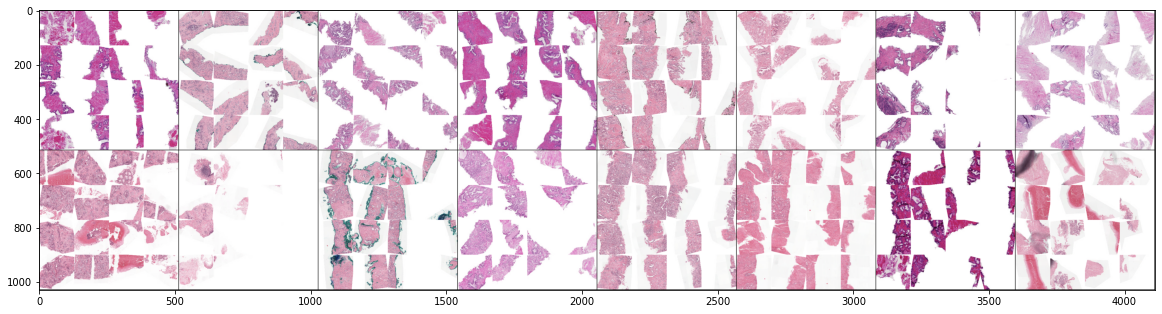

In [7]:
import torchvision
import matplotlib.pyplot as plt
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
plt.figure(figsize=(20,40))
images, labels = next(iter(model.trainloader))
# show images
imshow(torchvision.utils.make_grid(images))

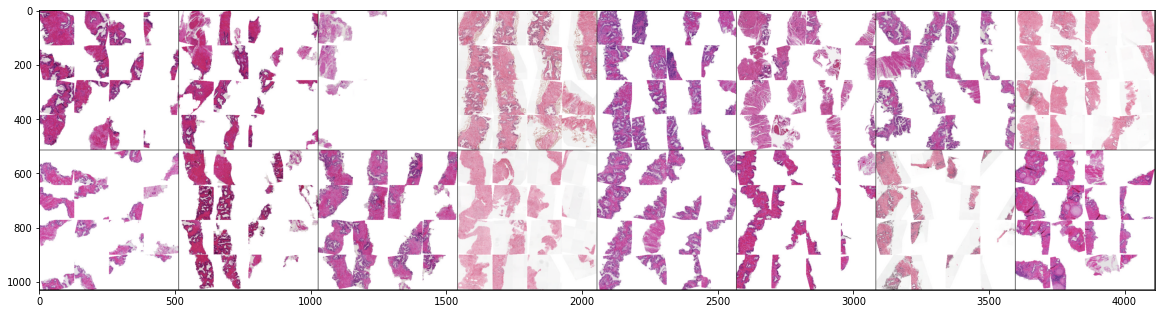

In [6]:
import torchvision
import matplotlib.pyplot as plt
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
plt.figure(figsize=(20,40))
images, labels = next(iter(model.valloader))
# show images
imshow(torchvision.utils.make_grid(images))

In [7]:
checkpoint_path = os.path.join(os.getcwd(), "checkpoint", model.model_name)
checkpoint_callback = ModelCheckpoint(
    filepath = checkpoint_path,
    save_top_k = 1,
    verbose = True,
    monitor = 'kappa_score/kappa_score',
    mode = 'max'
)

checkpoint_path

/home/kientiet/.local/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Checkpoint directory /home/kientiet/Documents/My Project/python/panda-kaggle/checkpoint/baseline/efficientnet-b0 exists and is not empty with save_top_k != 0.All files in this directory will be deleted when a checkpoint is saved!
  warnings.warn(*args, **kwargs)


'/home/kientiet/Documents/My Project/python/panda-kaggle/checkpoint/baseline/efficientnet-b0'

In [8]:
tb_logger = loggers.TensorBoardLogger('logs/', name = model.model_name)
trainer = pl.Trainer(checkpoint_callback = checkpoint_callback,
                    nb_sanity_val_steps = 0, 
                    max_epochs = max_epoches, 
                    gpus = -1, 
                    logger = tb_logger)

INFO:lightning:GPU available: True, used: True
INFO:lightning:CUDA_VISIBLE_DEVICES: [0]


# Learning finder

In [9]:
# lr_finder = trainer.lr_find(model, min_lr = 1e-8, max_lr = 5., num_training = 200)

In [10]:
# fig = lr_finder.plot(suggest = True)

In [9]:
model.optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    initial_lr: 0.0005
    lr: 0.0
    weight_decay: 0
)

## Start to train

In [ ]:
trainer.fit(model)

INFO:lightning:
    | Name                                                      | Type                    | Params
--------------------------------------------------------------------------------------------------
0   | loss_func                                                 | BCELoss                 | 0     
1   | encoder                                                   | EfficientNetModel       | 4 M   
2   | encoder.encoder                                           | EfficientNet            | 4 M   
3   | encoder.encoder._conv_stem                                | Conv2dStaticSamePadding | 864   
4   | encoder.encoder._conv_stem.static_padding                 | ZeroPad2d               | 0     
5   | encoder.encoder._bn0                                      | BatchNorm2d             | 64    
6   | encoder.encoder._blocks                                   | ModuleList              | 3 M   
7   | encoder.encoder._blocks.0                                 | MBConvBlock             | 1



>> Running with cosine scheduler
>> Return trainloader
>> Return valloader


/home/kientiet/.local/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:143: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


INFO:lightning:
Epoch 00000: kappa_score/kappa_score reached 0.50686 (best 0.50686), saving model to /home/kientiet/Documents/My Project/python/panda-kaggle/checkpoint/baseline/efficientnet-b0/epoch=0.ckpt as top 1


INFO:lightning:
Epoch 00001: kappa_score/kappa_score reached 0.55705 (best 0.55705), saving model to /home/kientiet/Documents/My Project/python/panda-kaggle/checkpoint/baseline/efficientnet-b0/epoch=1.ckpt as top 1


INFO:lightning:
Epoch 00002: kappa_score/kappa_score  was not in top 1


INFO:lightning:
Epoch 00003: kappa_score/kappa_score reached 0.61589 (best 0.61589), saving model to /home/kientiet/Documents/My Project/python/panda-kaggle/checkpoint/baseline/efficientnet-b0/epoch=3.ckpt as top 1


INFO:lightning:
Epoch 00004: kappa_score/kappa_score reached 0.62279 (best 0.62279), saving model to /home/kientiet/Documents/My Project/python/panda-kaggle/checkpoint/baseline/efficientnet-b0/epoch=4.ckpt as top 1


INFO:lightning:
Epoch 00005: kappa_score/kappa_score  was not in top 1


INFO:lightning:
Epoch 00006: kappa_score/kappa_score  was not in top 1


INFO:lightning:
Epoch 00007: kappa_score/kappa_score reached 0.64312 (best 0.64312), saving model to /home/kientiet/Documents/My Project/python/panda-kaggle/checkpoint/baseline/efficientnet-b0/epoch=7.ckpt as top 1


INFO:lightning:
Epoch 00008: kappa_score/kappa_score reached 0.66271 (best 0.66271), saving model to /home/kientiet/Documents/My Project/python/panda-kaggle/checkpoint/baseline/efficientnet-b0/epoch=8.ckpt as top 1


INFO:lightning:
Epoch 00009: kappa_score/kappa_score  was not in top 1


INFO:lightning:
Epoch 00010: kappa_score/kappa_score  was not in top 1


INFO:lightning:
Epoch 00011: kappa_score/kappa_score  was not in top 1


INFO:lightning:
Epoch 00012: kappa_score/kappa_score  was not in top 1


INFO:lightning:
Epoch 00013: kappa_score/kappa_score  was not in top 1


INFO:lightning:
Epoch 00014: kappa_score/kappa_score  was not in top 1


INFO:lightning:
Epoch 00015: kappa_score/kappa_score reached 0.66713 (best 0.66713), saving model to /home/kientiet/Documents/My Project/python/panda-kaggle/checkpoint/baseline/efficientnet-b0/epoch=15.ckpt as top 1


INFO:lightning:
Epoch 00016: kappa_score/kappa_score reached 0.70620 (best 0.70620), saving model to /home/kientiet/Documents/My Project/python/panda-kaggle/checkpoint/baseline/efficientnet-b0/epoch=16.ckpt as top 1


INFO:lightning:
Epoch 00017: kappa_score/kappa_score  was not in top 1


INFO:lightning:
Epoch 00018: kappa_score/kappa_score  was not in top 1


INFO:lightning:
Epoch 00019: kappa_score/kappa_score  was not in top 1
